#Importing the modules

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

TensorFlow 2.x selected.


##NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays.
##Like when i am using scaler.fit_transform(x_test) then the output will be recieved in a variable whose type is numpy array which is supported by numpy module.

##Pandas is used for data analysis, sir like here in one line of code (pd.read_csv()), i am able to get the content of my file ,if i didn't use this then i have to apply file handling to read the file.

##Scikit-learn have various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means etc.
##Here i have used it to split my dataset.

In [0]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

#Reading data from customer.csv


In [0]:
dataset = pd.read_csv('customer.csv')  

#Printing the content of the file


In [0]:
dataset 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#Features that are not important was removed .
#Exited is our dependent vaariable so I took it in another variable y.
##Customer id is not important because they are just numbers assigned to each customer.
##Rownumber is not important because they are just representing the rows.
##Surname is not important because a persons surname cannot helps us to determine that whether the person will leave the bank or not.

In [0]:
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1) 
y = dataset['Exited'] 

#X.head basically returns top n rows of the dataset,by default it returns 5 rows
##dataset after removing Customerid,surname,rownumber and exited.

In [0]:
X.head(10) 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [0]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder


#Here, i make the object for the label encoder,and then fitting the object on the column geography and gender ,because these are the categorical features which needs to get converted into some numerical values ,so that the computation can be done.

In [0]:
label = LabelEncoder()
X['Geography'] = label.fit_transform(X['Geography'])
label1 = LabelEncoder()
X['Gender'] = label1.fit_transform(X['Gender'])

In [0]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


#Here i am performing one hot encoding,by making dummy variables so that our categorical data get convert into some numericalvalues.
##Basically in one hot encoding we create dummy variables,so here for geography we have three countries so there will be three variables and value 1 is assign for the corresponding country.
##But this will also increase the no. of features so to reduce the no features we can exclude one of the dummy variable ,because with the help of two we can get the same information

In [0]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [0]:
from sklearn.preprocessing import StandardScaler


#Here i am splitting the dataset into training and test set with the help of train test split module.
##And then the standarization of the data is done, so as to get the data for different features on a same scale.
##In,sk learn splitting is done in this way.
##The function basically returns splitted train and test subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)


##The main idea of standardization is to make the mean = 0 and standard deviation = 1 of the features  of our dataset before applying machine learning techniques.
##And this is done by using the equation z=x-u/s,where u is the mean for each column and s is standard deviation.
##So ,when we apply fit method then for each column ,mean and standard devition is calculated.
##And when we use tranform ,then the above equation is used by the standard scaler method and the computation is done on the calculated mean and standard deviation.

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print('X_train')
print(X_train.round(2))
print('X_test')
X_test = scaler.transform(X_test)
X_test.round(2)


X_train
[[-1.24 -1.1   0.78 ...  1.64 -0.58 -0.58]
 [ 0.76  0.91 -0.27 ... -1.56  1.73 -0.58]
 [-1.73 -1.1  -0.94 ...  1.1  -0.58 -0.58]
 ...
 [-0.51  0.91  0.88 ... -1.02  1.73 -0.58]
 [ 0.74 -1.1  -0.37 ... -1.48 -0.58 -0.58]
 [ 0.96  0.91 -1.33 ...  0.51 -0.58  1.74]]
X_test


array([[-1.98, -1.1 ,  0.11, ..., -0.15,  1.73, -0.58],
       [ 0.65, -1.1 , -1.42, ...,  0.37,  1.73, -0.58],
       [ 0.13,  0.91,  2.41, ..., -1.46, -0.58,  1.74],
       ...,
       [-1.21,  0.91,  0.21, ..., -1.5 , -0.58, -0.58],
       [ 1.1 , -1.1 ,  1.55, ..., -0.11, -0.58,  1.74],
       [ 0.98, -1.1 , -0.75, ...,  0.7 , -0.58,  1.74]])

#Building ANN
##Here i am creating a sequential model and then adding layers to the model

In [0]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
#model.add(Dense(128,activation='sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

##Adam is the the combination of RMSprop and SGD with momentum so i used it.
##There, are lots of optimizers like SGD,RMSprop,Adagrad,Adadelta,Nadam.
##Binary_crossentropy is a loss function which is generally used for classification problems,so i used it for my classification problem.

##Others loss function are MSE,MAE,Huber,Hinge.
##MSE ,MAE and Huber are generally used for regression problems while Hinge is used for classification problems.

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [0]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 8, verbose = 1)


Train on 8000 samples
Epoch 1/8
8000/8000 [==============================] - 1s 187us/sample - loss: 0.3370 - accuracy: 0.8606
Epoch 2/8
8000/8000 [==============================] - 1s 184us/sample - loss: 0.3350 - accuracy: 0.8631
Epoch 3/8
8000/8000 [==============================] - 1s 187us/sample - loss: 0.3330 - accuracy: 0.8634
Epoch 4/8
8000/8000 [==============================] - 1s 184us/sample - loss: 0.3315 - accuracy: 0.8652
Epoch 5/8
8000/8000 [==============================] - 2s 188us/sample - loss: 0.3306 - accuracy: 0.8649
Epoch 6/8
8000/8000 [==============================] - 1s 182us/sample - loss: 0.3280 - accuracy: 0.8654
Epoch 7/8
8000/8000 [==============================] - 1s 187us/sample - loss: 0.3262 - accuracy: 0.8658
Epoch 8/8
8000/8000 [==============================] - 1s 183us/sample - loss: 0.3267 - accuracy: 0.8636


#Test set accuracy

In [0]:
results = model.evaluate(X_test , y_test , batch_size = 10 , verbose = 1 )

##86 is the test set accuracy, like if i have 100 data points in my test set then the model correctly classifies  86 out of them.

In [0]:
acc_1 = results[1]*100
print("Test set accuracy : {}".format(acc_1.round(2))) 

Test set accuracy : 86.0


#Test set loss

In [0]:
print("Test set loss : {}".format(results[0]))


Test set loss : 0.3414118045382202


#predicted values for x test

In [0]:
y_pred = model.predict_classes(X_test)

#Here ,0 indicates that the customer will not leave the bank while 1 represents that the customer will leave the bank.

In [0]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

#Confusion matrix

##Here, the 1530 represents the true positive while the 190 represents the true negatives.True positive basically means that the customers will leave the bank and they are correctly classified by the algorithm.
##While true negative means that the customer will not leave the bank and was correctly classified by the model.
##Basically true positive and true negative provide us the accuracy.

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
ck=confusion_matrix(y_test, y_pred)
ck

array([[1530,   63],
       [ 217,  190]])

#Plotting the confusion matrix

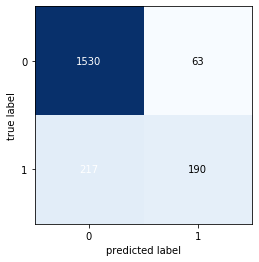

In [0]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=ck)
plt.show()

#Accuracy score of the model.
##This, is the accuracy of the model on the test data.
##which is 0.86
##It is calculated by adding the no. of true positives and no. of true negative divided by the total no. of predictions.

In [0]:
accuracy_score(y_test, y_pred)


0.86

In [0]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


#predicting on some unseen data

In [0]:
c=model.predict([[615,1,22,5,20000,5,1,1,60000,0,0]])

##This,output indicate that a person which has 615 as credit score,gender as male ,age as 22,tenure as 5 ,balance in the account is 20000,no.of products is 1,has card,is a active member and has salary of 60000 with geography as spain will leave the bank in future.

In [0]:
c[0][0]

1.0